# <mark>`Create a CNN model and Optimizing it using keras tuner`</mark>
* Dataset = Fashion Mnist---> keras builtin dataset

Kindly if you guys wants to run this notebook on CPU. 

##### ❗ kindly don't do this.. because this notebook takes arounds 2 hours to complete full iterations, trials and epochs

##### 💯 Upload this notebook to google colab and change runtime to <mark>`GPU`</mark>... GPU gives us 4x-5x speed. 5 or 4 times faster than CPU

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
tf.__version__

'2.4.1'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

In [11]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

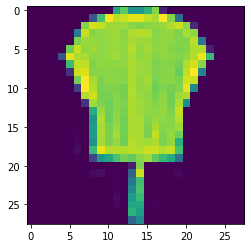

In [17]:
plt.imshow(train_images[56]);

## <mark>`Data Normalization`</mark>

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
train_images[2].shape, test_images[4].shape

((28, 28), (28, 28))

In [20]:
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

### <mark>`CNN Architecture`</mark>

**Figure 1**


<img src="https://www.researchgate.net/publication/338199242/figure/fig1/AS:840889396113413@1577495063054/Basic-structure-of-a-CNN.jpg">

**Figure 2**


<img src="https://miro.medium.com/max/724/0*0zhQv-8SGGzVGETN.png">

**<mark>`filters`</mark>**
>`filters` is multplying metrics with part of image to get edges of the images or parts of an images.


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBPlW6IcEEhwhTkguVESbV_lEd26qF6lZn5Q&usqp=CAU" width="500" height="600">

>in the code below we specify filters that means selecting different values for filters
`mix_value` and `max_values` for filters is how many filters we select between 32 and 128

**<mark>`Kernel`</mark>**
>`kernel` is the size of the filters `metrics values`.
we specify values keras tuner will pick different values in that specific size as we mentioned



<img src="https://anhreynolds.com/img/cnn.png">

**<mark>`Flatten`</mark>**
> `Flatten` just flat the values of metrics values of an image.



<img src="https://missinglink.ai/wp-content/uploads/2019/04/Group-5.png">

**<mark>`Padding`</mark>**\
* same
* valid

<img src='https://aws1.discourse-cdn.com/business6/uploads/analyticsvidhya/original/2X/1/103763df32a7437e1ccefb15168856ae353dd597.png'>

In [39]:
def build_model(hp):
    model = keras.Sequential([keras.layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                                                kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
                                                activation='relu',
                                                input_shape=(28,28,1)),
                             keras.layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                                                kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
                                                activation='relu'),
                             keras.layers.Flatten(),
                             keras.layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                                               activation = 'relu'),
                             keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                 loss='sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

## <mark>`let's apply Keras tuner/hyperparametrs tuning`</mark>

In [35]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [40]:
tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5,
                            directory = 'output_directory', project_name = 'MNIST_fashion')

**this <mark>`search`</mark> function will search best parametrs for this build model**
* remember when ever we give this <mark>`max_trials`</mark> it will run only for 2 epochs and with the help of those 2 epochs tuner will find best parameters.
* latter on you can run any number of epochs

**<mark>`lets run to find the best hyperparameters for CNN model for fashion mnist dataset`</mark>**

In [41]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.1)

Trial 5 Complete [00h 05m 02s]
val_accuracy: 0.8558333516120911

Best val_accuracy So Far: 0.9035000205039978
Total elapsed time: 00h 33m 28s
INFO:tensorflow:Oracle triggered exit


In [43]:
tuner_search.results_summary()

Results summary
Results in output_directory\MNIST_fashion
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.001
Score: 0.9035000205039978
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 96
learning_rate: 0.001
Score: 0.9016666412353516
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.01
Score: 0.8730000257492065
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 48
learning_rate: 0.01
Score: 0.8648333549499512
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.01
Score: 0.8558333516120911


# 🤩🤩🤩
### Ahaaaan
you guys can see the best models is the first one which gives use 90+ accuracy

In [45]:
model = tuner_search.get_best_models(num_models=1)[0]

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 48)        1248      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        57648     
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               2150512   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1130      
Total params: 2,210,538
Trainable params: 2,210,538
Non-trainable params: 0
_________________________________________________________________


**Now the Best model is selected and we can use this model on our training and testing**

In [50]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 109s 64ms/step - loss: 0.1616 - accuracy: 0.9386 - val_loss: 0.2801 - val_accuracy: 0.9063
Epoch 5/10
1688/1688 [==============================] - 107s 63ms/step - loss: 0.1226 - accuracy: 0.9536 - val_loss: 0.2784 - val_accuracy: 0.9152
Epoch 6/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0942 - accuracy: 0.9641 - val_loss: 0.3150 - val_accuracy: 0.9123
Epoch 7/10
1688/1688 [==============================] - 101s 60ms/step - loss: 0.0707 - accuracy: 0.9725 - val_loss: 0.3553 - val_accuracy: 0.9148
Epoch 8/10
1688/1688 [==============================] - 100s 59ms/step - loss: 0.0561 - accuracy: 0.9789 - val_loss: 0.3629 - val_accuracy: 0.9157
Epoch 9/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0452 - accuracy: 0.9839 - val_loss: 0.4451 - val_accuracy: 0.9105
Epoch 10/10
1688/1688 [==============================] - 101s 60ms/step - loss: 0.0382 - accuracy: 0.9858 - val_loss: 

In [58]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.5523 - accuracy: 0.9066


In [59]:
test_loss

0.5523265600204468

In [60]:
test_accuracy

0.9065999984741211